In [4]:
from tensorflow.keras.datasets import mnist
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense,Flatten
from tensorflow.keras.utils import to_categorical
from matplotlib import pyplot as plt
from tensorflow.keras.regularizers import l1,l2
from sklearn.metrics import accuracy_score , confusion_matrix
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt



Load the MNIST dataset

In [9]:
(train_data,train_target),(test_data,test_target) = mnist.load_data()

11490434/11490434 [==============================] - 0s 0us/step


Visualize the dataset

Target labels:  [3 3 1 6 1 4 2 9 1 5]


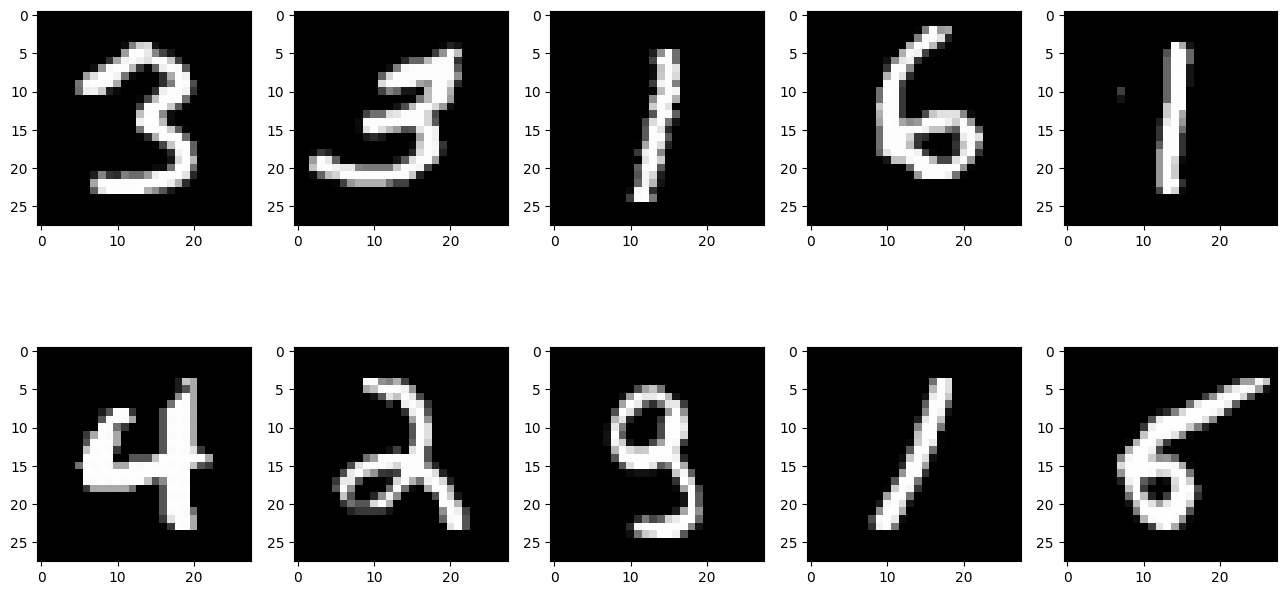

In [10]:
fig, axs = plt.subplots(2, 5, figsize=(16,8))
random_numbers = np.random.randint(0, 60000, 10)
print('Target labels: ',train_target[random_numbers])
for idx, ax in enumerate(axs.ravel()):
    ax.imshow(train_data[random_numbers[idx]],cmap='gray')
plt.show()

Pre-processing stage

In [11]:
new_train_data = train_data/255.0
new_test_data=test_data/255.0

new_train_target = to_categorical(train_target)
new_test_target = to_categorical(test_target)

Create the Model architecture

In [12]:
model=Sequential()

model.add(Flatten(input_shape=(28,28)))

model.add(Dense(64,activation='relu' , kernel_regularizer = l1(0.000001)))
model.add(Dense(64,input_dim=64,activation='relu', kernel_regularizer = l1(0.000001)))
model.add(Dense(32,input_dim=64,activation='relu', kernel_regularizer = l1(0.000001)))
model.add(Dense(10,input_dim=32,activation='softmax'))
model.compile(loss='categorical_crossentropy',optimizer='adam',metrics=['accuracy'])

In [13]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten_1 (Flatten)         (None, 784)               0         
                                                                 
 dense_4 (Dense)             (None, 64)                50240     
                                                                 
 dense_5 (Dense)             (None, 64)                4160      
                                                                 
 dense_6 (Dense)             (None, 32)                2080      
                                                                 
 dense_7 (Dense)             (None, 10)                330       
                                                                 
Total params: 56,810
Trainable params: 56,810
Non-trainable params: 0
_________________________________________________________________


Train the model

In [14]:
train_info = model.fit(new_train_data , new_train_target , epochs = 50)

Epoch 1/50
1875/1875 [==============================] - 6s 2ms/step - loss: 0.2944 - accuracy: 0.9131
Epoch 2/50
1875/1875 [==============================] - 5s 3ms/step - loss: 0.1309 - accuracy: 0.9602
Epoch 3/50
1875/1875 [==============================] - 4s 2ms/step - loss: 0.0963 - accuracy: 0.9717
Epoch 4/50
1875/1875 [==============================] - 5s 3ms/step - loss: 0.0786 - accuracy: 0.9771
Epoch 5/50
1875/1875 [==============================] - 5s 3ms/step - loss: 0.0667 - accuracy: 0.9808
Epoch 6/50
1875/1875 [==============================] - 5s 3ms/step - loss: 0.0559 - accuracy: 0.9834
Epoch 7/50
1875/1875 [==============================] - 5s 3ms/step - loss: 0.0494 - accuracy: 0.9853
Epoch 8/50
1875/1875 [==============================] - 4s 2ms/step - loss: 0.0429 - accuracy: 0.9875
Epoch 9/50
1875/1875 [==============================] - 6s 3ms/step - loss: 0.0406 - accuracy: 0.9885
Epoch 10/50
1875/1875 [==============================] - 5s 3ms/step - loss: 0.034

Plot the loss and accuracy graphs

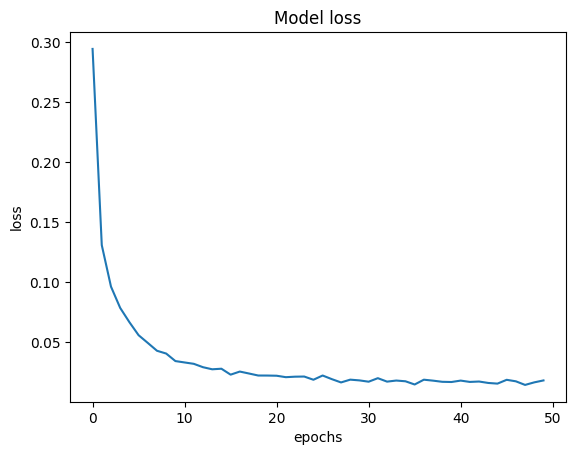

In [15]:
plt.plot(train_info.history['loss'])
plt.xlabel('epochs')
plt.ylabel('loss')
plt.title('Model loss')
plt.show()

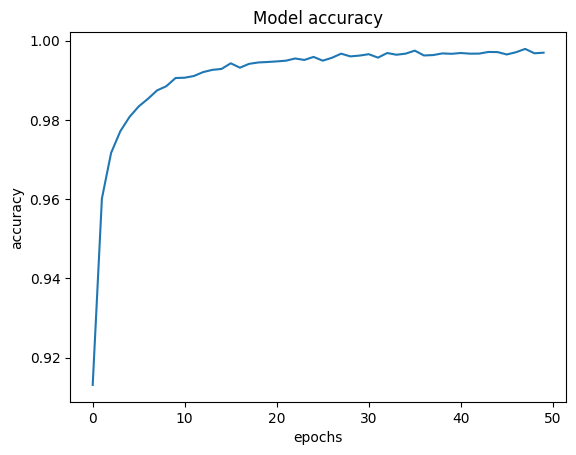

In [16]:
plt.plot(train_info.history['accuracy'])
plt.xlabel('epochs')
plt.ylabel('accuracy')
plt.title('Model accuracy')
plt.show()

Test the performance of Model

In [17]:
loss, acc = model.evaluate(new_test_data , new_test_target)
print(f'Loss of the Test dataset is: {loss}\nAccuracy of the test dataset is: {acc}')

313/313 [==============================] - 1s 2ms/step - loss: 0.1803 - accuracy: 0.9758
Loss of the Test dataset is: 0.1802941858768463
Accuracy of the test dataset is: 0.9757999777793884


Save the model weights

In [ ]:
model.save_weights('MNIST_WEIGHTS_V1.h5')

313/313 [==============================] - 1s 1ms/step


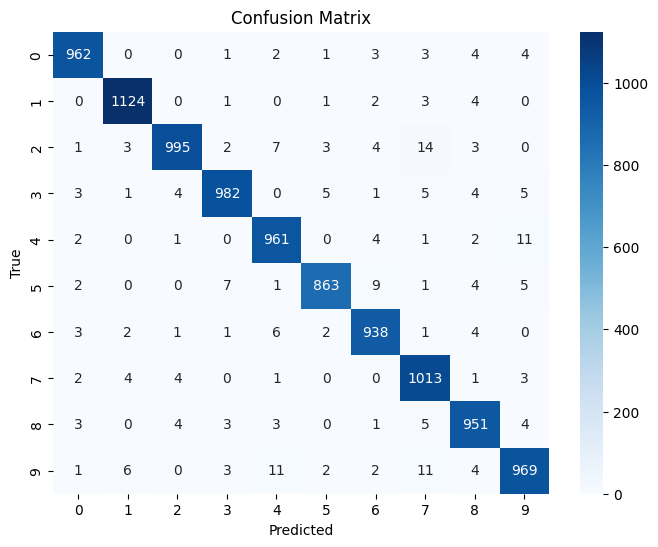

In [18]:
predictions = model.predict(new_test_data)
predicted_labels = np.argmax(predictions,axis=1)
true_labels = np.argmax(new_test_target , axis=1)
cm = confusion_matrix(true_labels , predicted_labels)
plt.figure(figsize=(8,6))
sns.heatmap(cm , annot=True , fmt="d" , cmap="Blues" , xticklabels=np.unique(true_labels) , yticklabels=np.unique(true_labels))
plt.xlabel("Predicted")
plt.ylabel("True")
plt.title('Confusion Matrix')
plt.show()
